In [452]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [453]:
df = pd.read_pickle('test.pkl')
df.head()

,trajectory,interval_length,interval_value,well_type
0,0,0.040004,positive,shallow well
1,0,0.010001,negative,deep well
2,0,0.110011,positive,shallow well
3,0,0.010001,negative,deep well
4,0,0.030003,positive,shallow well


In [454]:
int_len = df[df['well_type'] == 'shallow well']['interval_length'].to_numpy()
data_clean = int_len[int_len > 0.15]
rate = 1/np.mean(data_clean)

In [455]:
def exp_cdf(x, rate):
    return 1 - np.exp(-rate * x)

In [456]:
x_transformed = exp_cdf(data_clean, rate)
x_sort_trans = np.sort(x_transformed)

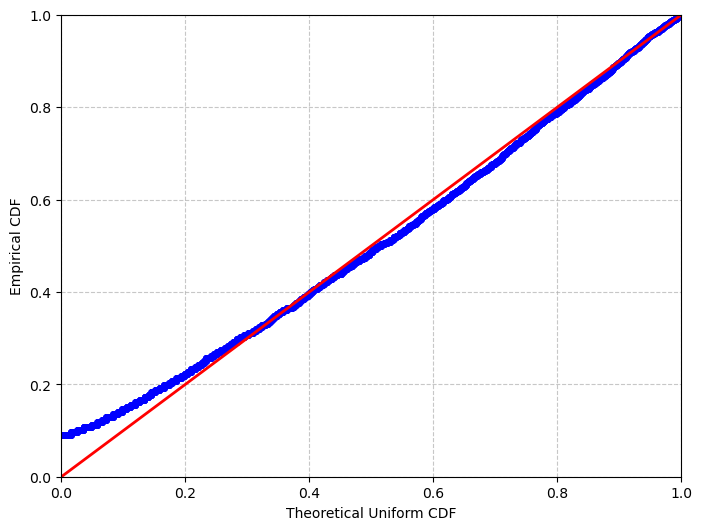

In [457]:
theoretical_points = np.linspace(0, 1, len(x_sort_trans))

plt.figure(figsize=(8, 6))
plt.plot(theoretical_points, x_sort_trans, 'bo', markersize=4)
plt.plot([0, 1], [0, 1], 'r-', linewidth=2)  # Diagonal reference line
plt.xlabel('Theoretical Uniform CDF')
plt.ylabel('Empirical CDF')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [462]:
stats.kstest(x_sort_trans[x_sort_trans > 0.2], 'expon', args=(0, 1/rate))

KstestResult(statistic=0.5329384798828827, pvalue=0.0, statistic_location=0.9999577126037887, statistic_sign=1)